In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
def smooth(y, window):
    out = []
    for i in range(len(y) - window):
        out.append(np.mean(y[i:i+window]))
    return np.asarray(out)

In [41]:
window = 20
by_person = []
labels = [' neutural', ' happy', ' sad', ' surprise', ' angry']
for i in range(4):
    res = pd.read_csv('audience%d.csv'%i, index_col=False)
    by_person.append(res)
person = ['Mark', 'Sonja', 'Jingjin', 'Shan']

In [85]:
by_person[0]

,timestamp,neutural,happy,sad,surprise,angry
0,0,0.991,0.000,0.006,0.002,0.001
1,1,0.706,0.000,0.243,0.010,0.040
2,2,0.257,0.000,0.740,0.001,0.002
3,3,0.952,0.000,0.020,0.001,0.028
4,4,0.962,0.000,0.036,0.001,0.001
5,5,0.983,0.000,0.013,0.001,0.003
6,6,0.985,0.000,0.009,0.005,0.002
7,7,0.993,0.000,0.003,0.001,0.002
8,8,0.908,0.001,0.043,0.005,0.043
9,9,0.983,0.000,0.008,0.003,0.006


(0, 1)

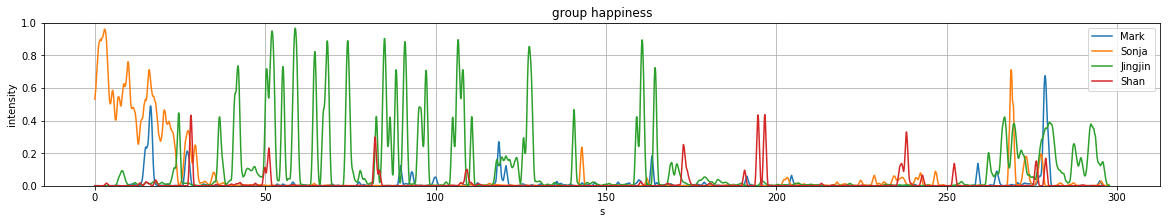

In [66]:
# 25 frames per second
plt.figure(figsize = [20,3])
for i in range(4):
    plt.plot(by_person[i]['timestamp'][:-2 * window]/25, smooth(smooth(by_person[i][' happy'], window), window), '-', label = person[i])
    
plt.title('group happiness')
plt.grid()
plt.ylabel('intensity')
plt.xlabel('s')
plt.legend(loc = 'upper right')
plt.ylim([0, 1])

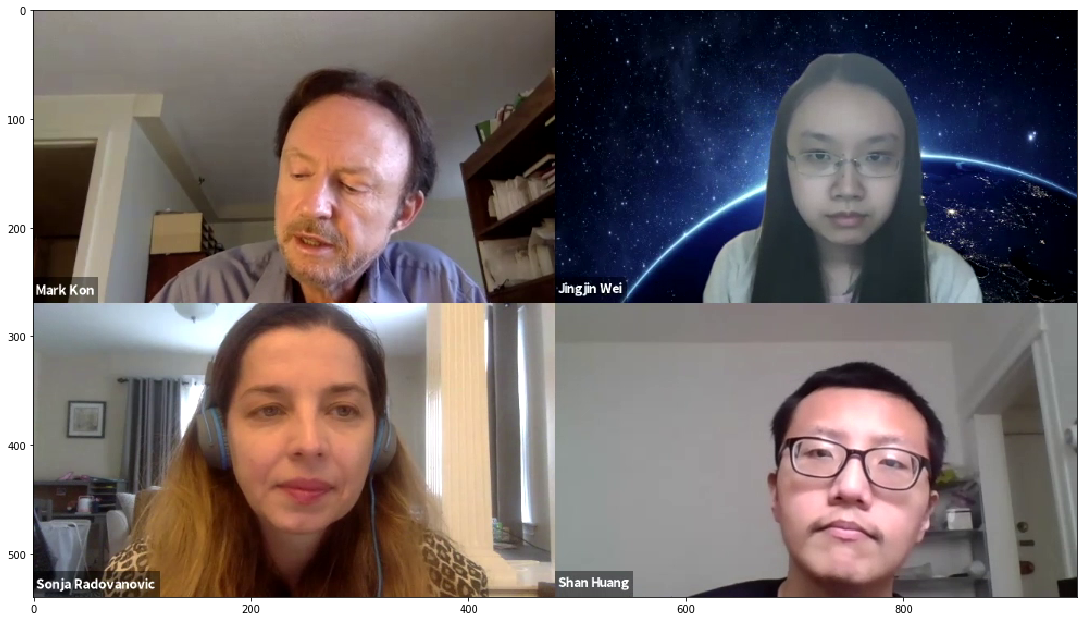

In [65]:
video = cv2.VideoCapture("My Movie.mp4")
for i in range(410):
    ok, frame = video.read()
frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
plt.figure(figsize = [19.2, 10.8])
plt.imshow(frame)

(0, 1)

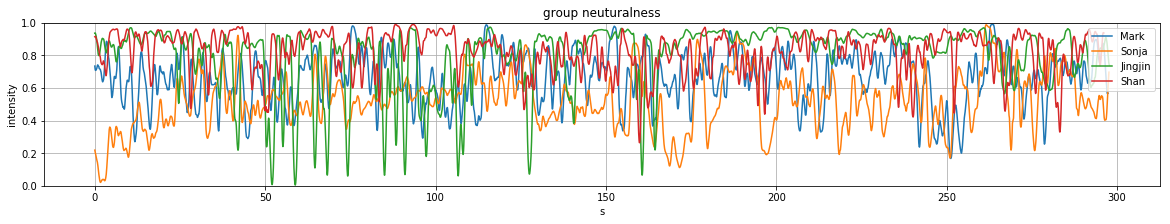

In [43]:
plt.figure(figsize = [20,3])
for i in range(4):
    plt.plot(by_person[i]['timestamp'][:-2 * window]/25, smooth(smooth(by_person[i][' neutural'], window), window), '-', label = person[i])
    
plt.title('group neuturalness')
plt.grid()
plt.ylabel('intensity')
plt.xlabel('s')
plt.legend(loc = 'upper right')
plt.ylim([0, 1])

Mark: 0.3361422288332649
Sonja: 0.4755390432601031
Jingjin: 0.20133434684991153
Shan: 0.17532858740395169


(0, 1)

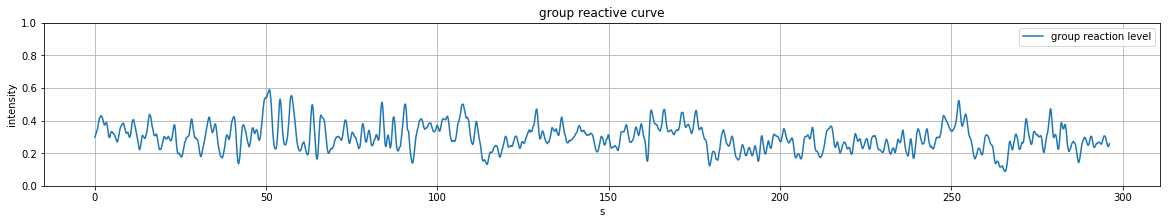

In [44]:
plt.figure(figsize = [20,3])
min_index = 5
min_len = float('Inf')
for i in range(4):
    if len(by_person[i]) < min_len:
        min_index = i
        min_len = len(by_person[i])
    
reaction_average = np.zeros(min_len - 2 * window)
reaction_level_by_person = []
for i in range(4):
    reaction_by_person = 1 - smooth(smooth(by_person[i][' neutural'], window), window)
    reaction_level_by_person.append(np.mean(reaction_by_person))
    reaction_average += reaction_by_person[:len(reaction_average)]
    
for i in range(4):
    print(person[i] + ': ' + str(reaction_level_by_person[i]))
plt.plot(by_person[min_index]['timestamp'][:-2 * window]/25, reaction_average/4, '-', label = 'group reaction level')
plt.ylabel('intensity')
plt.xlabel('s')
plt.title('group reactive curve')
plt.grid()
plt.legend(loc = 'upper right')
plt.ylim([0, 1])

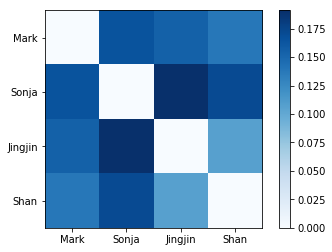

In [81]:
labels = [' neutural', ' happy', ' sad', ' surprise', ' angry']
def KL_divergence(person1, person2):
    diff = 0
    for label in labels:
        diff += np.mean(abs(by_person[person1][label] - by_person[person2][label]))
    return diff/len(labels)

confusion_plot = []
for i in range(4):
    confusion_by_person = []
    for j in range(4):
        confusion_by_person.append(KL_divergence(i, j))
    confusion_plot.append(confusion_by_person)

plt.imshow(confusion_plot, cmap=plt.get_cmap('Blues'))
plt.xticks([0, 1, 2, 3], person)
plt.yticks([0, 1, 2, 3], person)
plt.colorbar()

In [84]:
for i in range(4):
    print(person[i] + ': %.4f'%(np.sum(confusion_plot[i])/3))

Mark: 0.1528
Sonja: 0.1759
Jingjin: 0.1509
Shan: 0.1387
